#### Importing Libraries

In [46]:
import pandas as pd
import os
import matplotlib.pyplot as plt


### Merging 12 month of sales data into a single file

In [47]:
df=pd.read_csv(r"D:\COLLEGE\PROJECTS\DA\Sales\Sales_Data\Sales_April_2019.csv")
csv_files = [
    file for file in os.listdir('D:\COLLEGE\PROJECTS\DA\Sales\Sales_Data')]
#Creating an Empty Data Frame
all_months=pd.DataFrame()
for file in csv_files:
    df=pd.read_csv(r"D:/COLLEGE/PROJECTS/DA/Sales/Sales_Data/"+ file)
    all_months = pd.concat([all_months,df])

all_months.to_csv("all_data.csv", index=False)

In [48]:
#Reading new data
all_data = pd.read_csv("all_data.csv")
all_data.columns.duplicated().any()

False

Clean data

In [49]:
all_data =all_data.dropna(how="all")
all_data = all_data[all_data['Order Date'].str[0:2]!="Or"]

all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

Add month column

In [50]:
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data['Months']  = all_data['Months'].astype(int)
# all_data.head()

Add a sales column

In [51]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#Question 1: What was the best month for sales? 

In [52]:
q1=all_data.groupby('Months').sum()
q1

,Quantity Ordered,Price Each,Sales
Months,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


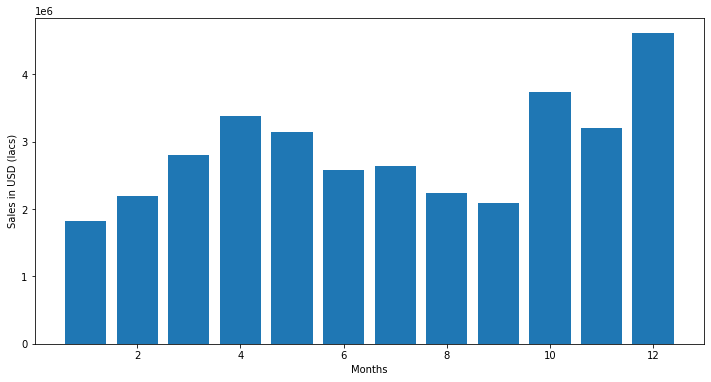

In [97]:
plt.figure(figsize=(12,6))
months= range(1,13)
plt.bar(months,q1['Sales'])
plt.ylabel('Sales in USD (lacs)')
plt.xlabel('Months')
plt.show()

What city sold the most product?

In [67]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [82]:
q2=all_data.groupby('City').sum()

TypeError: 'range' object is not callable

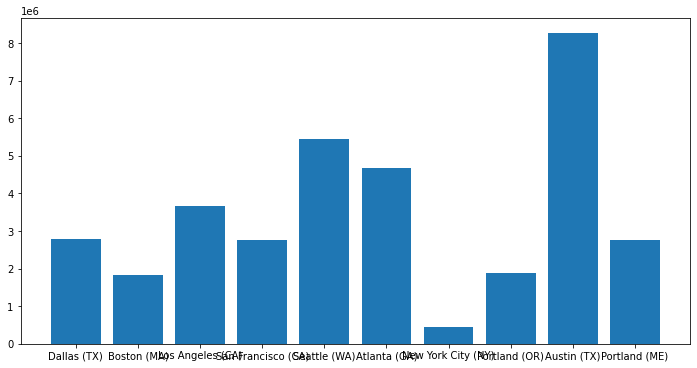

In [95]:
plt.figure(figsize=(12,6))
cities = all_data['City'].unique()
plt.bar(cities,q2['Sales'])
plt.xticks(rotation= 90)
plt.ylabel('Sales in USD (lacs)')
plt.xlabel('Cities')
plt.show()

What time should we display advertisemens to maximize the likelihood of customer’s buying product?

What products are most often sold together?

What product sold the most? Why do you think it sold the most?